In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 模擬版資料做 SVM

In [4]:
x = np.array([[6, 6], [10, 8], [3, 7], [8, 7]])

In [5]:
x

array([[ 6,  6],
       [10,  8],
       [ 3,  7],
       [ 8,  7]])

In [6]:
x[:, 0]

array([ 6, 10,  3,  8])

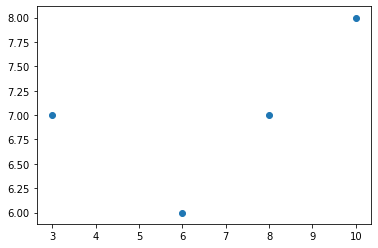

In [7]:
plt.scatter(x[:, 0], x[:, 1])

In [9]:
y = np.array([1, 2, 1, 2])

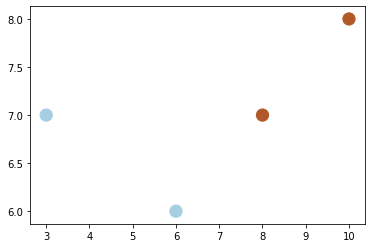

In [13]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="Paired", s=150)

### Step1. 打開函數學習機

In [14]:
from sklearn.svm import SVC 

In [18]:
clf = SVC(gamma="auto")

### Step2. 學習

In [19]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step3. 預測

In [21]:
y_predict = clf.predict(x)

In [22]:
y_predict

array([1, 2, 1, 2])

In [23]:
y

array([1, 2, 1, 2])

In [29]:
xr = np.random.rand(100)*7 + 3
yr = np.random.rand(100)*2 + 6

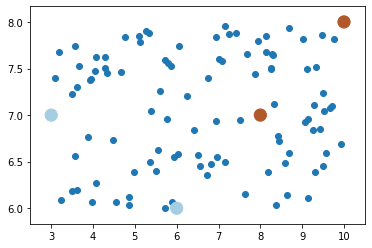

In [32]:
plt.scatter(xr, yr)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="Paired", s=150)

In [33]:
print("X", xr[:5])
print("Y", yr[:5])

X [3.19504834 9.01970798 9.75188667 8.64544336 4.97417587]
Y [7.67495961 7.8114626  7.8219236  6.14114749 6.39107887]


In [35]:
X = np.c_[xr, yr]

In [36]:
Y = clf.predict(X)

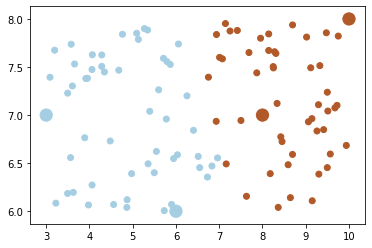

In [37]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="Paired", s=150)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired" )

#### 結果呈現

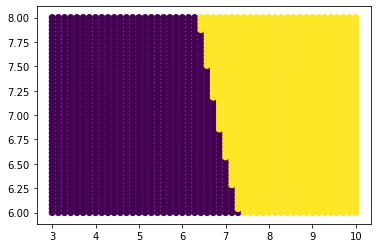

In [44]:
x_list = np.linspace(3, 10, 50)
y_list = np.linspace(6, 8, 50)
X, Y = np.meshgrid(x_list, y_list)
P = np.c_[X.ravel(), Y.ravel()]
C = clf.predict(P)
plt.scatter(P[:, 0], P[:, 1], c=C)

In [43]:
X.ravel()

array([ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
        9.85714286, 10.        ])

### 插播: contour用法

In [45]:
xL = np.array([1, 2, 3, 4])
yL = np.array([5, 6, 7, 8])
X, Y = np.meshgrid(xL, yL)

In [46]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [47]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [48]:
Z = np.random.randint(1, 3, (4, 4))

In [49]:
Z

array([[2, 2, 2, 2],
       [1, 2, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 2, 2]])

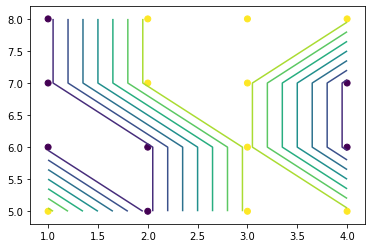

In [54]:
Z = np.random.randint(1, 3, (4, 4))
plt.contour(X, Y, Z)
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())

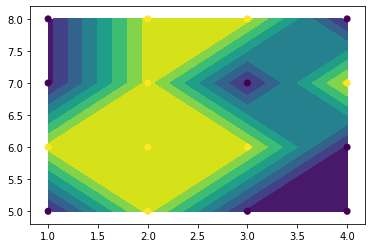

In [65]:
Z = np.random.randint(1, 3, (4, 4))
plt.contourf(X, Y, Z)
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())

### 資料視覺化終極版

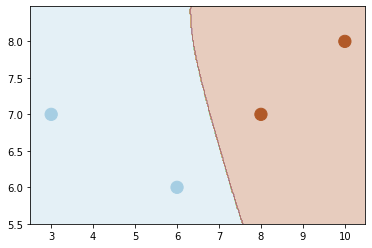

In [78]:
x_arr = np.arange(2.5, 10.5, 0.02)
y_arr = np.arange(5.5, 8.5, 0.02)
X, Y = np.meshgrid(x_arr, y_arr)
P = np.c_[X.ravel(), Y.ravel()]
z = clf.predict(P)
Z = z.reshape(X.shape)

plt.contourf(X, Y, Z, cmap="Paired", alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="Paired", s=150)

In [67]:
P

array([[3.  , 6.  ],
       [3.02, 6.  ],
       [3.04, 6.  ],
       ...,
       [9.94, 7.98],
       [9.96, 7.98],
       [9.98, 7.98]])

In [68]:
clf.predict(P)

array([1, 1, 1, ..., 2, 2, 2])

## 鳶尾花數據庫

In [80]:
from sklearn.datasets import load_iris

In [86]:
iris = load_iris()

In [88]:
# print(iris.DESCR)

In [90]:
x = iris.data
y = iris.target

In [91]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [92]:
y[:5]

array([0, 0, 0, 0, 0])

In [94]:
X = x[:, :2]

In [95]:
Y = y

In [96]:
len(X)

150

### 區分訓練資料和測試資料

In [97]:
from sklearn.model_selection import train_test_split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

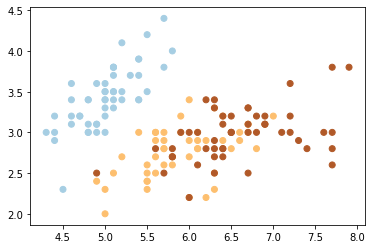

In [101]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired")

### Step1. 開一台函數學習機

In [102]:
cif = SVC(gamma="auto")

### Step2. 訓練

In [103]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step3. 預測

In [104]:
y_predict = clf.predict(x_test)

In [105]:
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [106]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [107]:
y_predict - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

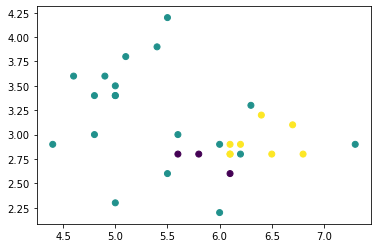

In [108]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_predict-y_test)

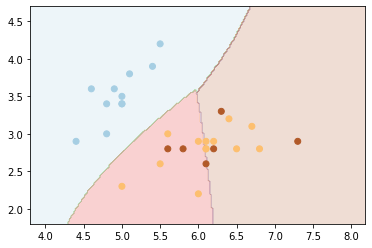

In [113]:
x0 = np.arange(3.8, 8.2, 0.02)
y0 = np.arange(1.8, 4.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap="Paired", alpha=0.2)

plt.scatter(x_test[:, 0], x_test[:, 1], cmap="Paired", c=y_test)